# 1. Data import and processing

## 1.1 引入数据集，生成dataframe

In [1]:
import pandas as pd
import numpy as np

data_path ='./dataset_new.csv'
columns_name = ('date', 'time', 'sensor_id', 'value', 'activity', 'status') # status是begin或end
df = pd.read_csv(data_path, names = columns_name)

In [2]:
df.dtypes

date         object
time         object
sensor_id    object
value        object
activity     object
status       object
dtype: object

In [3]:
'''
#一些测试
df.iloc[:,:4]
df_first4Attr = df.iloc[:,:4]
df[df_first4Attr.isnull().values==True]
'''

'\n#一些测试\ndf.iloc[:,:4]\ndf_first4Attr = df.iloc[:,:4]\ndf[df_first4Attr.isnull().values==True]\n'

In [4]:
df['sensor_id'].unique()

array(['M35', 'AD1-A', 'M34', 'M32', 'M33', 'M36', 'M30', 'M29', 'M37',
       'M38', 'M39', 'M41', 'M40', 'M49', 'M46', 'M50', 'M44', 'M47',
       'M48', 'M43', 'M28', 'M42', 'M27', 'M26', 'M25', 'M24', 'M21',
       'M19', 'M18', 'M17', 'M16', 'M15', 'D09', 'M14', 'M13', 'M08',
       'M07', 'M02', 'M45', 'M51', 'D08', 'AD1-B', 'AD1-C', 'D10', 'I03',
       'M06', 'M09', 'M10', 'M01', 'D12', 'L04', 'M23', 'M31', 'D15',
       'D07', 'D14', 'M11', 'M05', 'M03', 'M04', 'M22', 'M12', 'M20',
       'L11', 'D05', 'D03', 'L10', 'L06', 'L13', 'L12', 'L09'],
      dtype=object)

## 1.2 判断缺失值

In [5]:
df.dropna(axis=0, how='all', inplace=True) ## 删去了两行空白行
df

,date,time,sensor_id,value,activity,status
0,02/02/2009,7:15:17,M35,ON,R1_Bed_to_Toilet,begin
1,02/02/2009,7:15:21,AD1-A,2.82231,NaN,NaN
2,02/02/2009,7:15:23,M35,OFF,NaN,NaN
3,02/02/2009,7:15:23,M35,ON,NaN,NaN
4,02/02/2009,7:15:28,AD1-A,2.79926,NaN,NaN
...,...,...,...,...,...,...
138625,04/04/2009,7:26:16,M48,OFF,NaN,NaN
138626,04/04/2009,7:27:47,M48,ON,NaN,NaN
138627,04/04/2009,7:27:50,M47,ON,NaN,NaN
138628,04/04/2009,7:27:59,M47,OFF,NaN,NaN


## 1.3 合并date和time

In [6]:
# df.drop(df.tail(1).index, inplace = True) #从尾部去掉 1 行，这一行是异常行

In [7]:
# df["datetime"] = pd.to_datetime(df["date"] + " "+ df["time"], format='%d/%m/%Y %H:%M:%S')
df["datetime"] = pd.to_datetime(df["date"] + " "+ df["time"], dayfirst=True)

# df["datetime"]


In [8]:
# df = df.set_index("datetime") #千万不能设datetime为index! 因为datetime有重复值！！！妈的，debug半个多小时。
df

,date,time,sensor_id,value,activity,status,datetime
0,02/02/2009,7:15:17,M35,ON,R1_Bed_to_Toilet,begin,2009-02-02 07:15:17
1,02/02/2009,7:15:21,AD1-A,2.82231,NaN,NaN,2009-02-02 07:15:21
2,02/02/2009,7:15:23,M35,OFF,NaN,NaN,2009-02-02 07:15:23
3,02/02/2009,7:15:23,M35,ON,NaN,NaN,2009-02-02 07:15:23
4,02/02/2009,7:15:28,AD1-A,2.79926,NaN,NaN,2009-02-02 07:15:28
...,...,...,...,...,...,...,...
138625,04/04/2009,7:26:16,M48,OFF,NaN,NaN,2009-04-04 07:26:16
138626,04/04/2009,7:27:47,M48,ON,NaN,NaN,2009-04-04 07:27:47
138627,04/04/2009,7:27:50,M47,ON,NaN,NaN,2009-04-04 07:27:50
138628,04/04/2009,7:27:59,M47,OFF,NaN,NaN,2009-04-04 07:27:59


In [9]:
# # 检查时间都是前一个<=后一个
# for a, b in zip(df.datetime, df.datetime[1:]):
#     if(a>b):
#         print(a)
#
# # all(a <= b for a, b in zip(df.index, df.index[1:]))

## 1.4 检查R1以及公共的各种行为不存在嵌套

In [10]:
df.activity.unique()

array(['R1_Bed_to_Toilet', nan, 'R1_Personal_Hygiene', 'R2_Bed_to_Toilet',
       'Meal_Preparation', 'R2_Personal_Hygiene', 'Watch_TV', 'R1_Work',
       'R2_Work', 'R1_Sleep', 'R2_Sleep', 'Wash_Bathtub', 'Clean',
       'Study'], dtype=object)

In [11]:
R1_activities = ["R1_Bed_to_Toilet", "R1_Personal_Hygiene", "Meal_Preparation", "Watch_TV", "R1_Work", "R1_Sleep", "Wash_Bathtub", "Clean", "Study"]
def check_if_R1_sleep_nesting(df):
    stack = []
    # cnt = 0
    for index,row in df.iterrows():
        if (df.loc[index, 'activity'] in R1_activities):
            if row.status == 'begin':
                stack.append(row.activity)
                # print(stack)
            elif row.status == 'end':
                stack.pop()
                # print(stack)
            if(len(stack) > 1):
                print("Alarm !")

        # # 每100次打印一次栈的状态
        # cnt += 1
        # if cnt % 100 == 0:
        #     print(stack)
    print("The final stack value:", stack)

check_if_R1_sleep_nesting(df)

# 发现有一些R1的个人行为和公共行为是存在嵌套的，不过不影响后续的提取。
# R1_sleep 是不存在嵌套的

Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
Alarm !
The final stack value: []


## 1.5 通过原有的dateframe 生成新的dataframe包含：activity, start_time, end_time, time_span

In [12]:
import datetime
def create_transformed_df(old_df, R1_activities):
    new_df = pd.DataFrame(columns=['activity', 'start_time', 'end_time', 'time_span'])

    # cnt = 0
    for activity_name in R1_activities:
        # 初始化
        start_time = datetime.time(0, 0, 0)
        end_time = datetime.time(0,0,0)
        time_span = 0
        for index,row in old_df.iterrows():
            if row.status == 'begin':
                if row.activity == activity_name:
                    print(activity_name)
                    # stack.append(row.activity)
                    start_time = row.datetime
            elif row.status == 'end':
                if row.activity == activity_name:
                    # 向new_df增加数据
                    # del(stack[stack.index(row.activity)])
                    end_time = row.datetime
                    time_span = (end_time - start_time).seconds
                    tmp_df = pd.DataFrame({'activity': [activity_name],
                    'start_time' : [start_time],
                    'end_time' : [end_time],
                    'time_span' : [time_span]})

                    new_df = pd.concat([new_df, tmp_df], ignore_index = True, axis = 0)


    return new_df



In [13]:
new_df = create_transformed_df(df, R1_activities)

R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toilet
R1_Bed_to_Toil

## 1.6 对new_df 增加一列，同类活动在一天中是第几次发生

In [14]:
new_df["sequence_in_a_day"] = 0
new_df

,activity,start_time,end_time,time_span,sequence_in_a_day
0,R1_Bed_to_Toilet,2009-02-02 07:15:17,2009-02-02 07:21:04,347,0
1,R1_Bed_to_Toilet,2009-02-03 07:29:34,2009-02-03 07:35:48,374,0
2,R1_Bed_to_Toilet,2009-02-04 07:26:00,2009-02-04 07:40:03,843,0
3,R1_Bed_to_Toilet,2009-02-05 06:51:44,2009-02-05 07:12:46,1262,0
4,R1_Bed_to_Toilet,2009-02-06 07:33:50,2009-02-06 07:53:46,1196,0
...,...,...,...,...,...
354,Study,2009-03-10 19:41:14,2009-03-10 22:41:16,10802,0
355,Study,2009-03-11 19:39:57,2009-03-11 22:09:45,8988,0
356,Study,2009-03-23 20:35:02,2009-03-23 22:23:05,6483,0
357,Study,2009-03-24 08:24:15,2009-03-24 08:36:44,749,0


In [15]:
activity_list = new_df.activity.unique()
flag = "none"
cnt = 0

for activity in activity_list:
    for index,row in new_df.iterrows():
        if row.activity == activity:
            if flag == "none": # 初始化
                flag = new_df.loc[index,"start_time"].strftime("%y-%m-%d")

            if row["start_time"].strftime("%y-%m-%d") == flag:
                cnt += 1
            else:
                flag = new_df.loc[index,"start_time"].strftime("%y-%m-%d")
                cnt = 1

            new_df.loc[index, "sequence_in_a_day"] = cnt

    # 当一个activity的遍历结束后，重置flag和cnt
    flag = "none"
    cnt = 0


In [16]:
new_df

,activity,start_time,end_time,time_span,sequence_in_a_day
0,R1_Bed_to_Toilet,2009-02-02 07:15:17,2009-02-02 07:21:04,347,1
1,R1_Bed_to_Toilet,2009-02-03 07:29:34,2009-02-03 07:35:48,374,1
2,R1_Bed_to_Toilet,2009-02-04 07:26:00,2009-02-04 07:40:03,843,1
3,R1_Bed_to_Toilet,2009-02-05 06:51:44,2009-02-05 07:12:46,1262,1
4,R1_Bed_to_Toilet,2009-02-06 07:33:50,2009-02-06 07:53:46,1196,1
...,...,...,...,...,...
354,Study,2009-03-10 19:41:14,2009-03-10 22:41:16,10802,1
355,Study,2009-03-11 19:39:57,2009-03-11 22:09:45,8988,1
356,Study,2009-03-23 20:35:02,2009-03-23 22:23:05,6483,1
357,Study,2009-03-24 08:24:15,2009-03-24 08:36:44,749,1


In [17]:
new_df.to_csv("ActivityStatistics.csv")

## 1.6 resample，计算每个activity每天/每周发生的次数

In [18]:
valid_R1_activities = ["R1_Bed_to_Toilet", "R1_Personal_Hygiene", "Meal_Preparation", "Watch_TV", "R1_Work", "R1_Sleep"] # "Wash_Bathtub", "Clean", "Study"这三个样本点太少了，直接抛弃

In [19]:
df_by_activity_list = []

for valid_activity in valid_R1_activities:
    tmp_df = new_df[new_df["activity"] == valid_activity]
    df_by_activity_list.append(tmp_df)

df_by_activity_list[1]

,activity,start_time,end_time,time_span,sequence_in_a_day
60,R1_Personal_Hygiene,2009-02-02 07:21:04,2009-02-02 07:38:34,1050,1
61,R1_Personal_Hygiene,2009-02-04 07:40:06,2009-02-04 07:46:36,390,1
62,R1_Personal_Hygiene,2009-02-05 23:06:31,2009-02-05 23:10:27,236,1
63,R1_Personal_Hygiene,2009-02-06 07:34:25,2009-02-06 07:54:02,1177,1
64,R1_Personal_Hygiene,2009-02-09 07:49:25,2009-02-09 08:09:05,1180,1
65,R1_Personal_Hygiene,2009-02-09 20:40:33,2009-02-09 20:45:34,301,2
66,R1_Personal_Hygiene,2009-02-10 11:51:47,2009-02-10 11:56:08,261,1
67,R1_Personal_Hygiene,2009-02-16 19:13:57,2009-02-16 19:15:06,69,1
68,R1_Personal_Hygiene,2009-02-17 08:37:25,2009-02-17 08:55:08,1063,1
69,R1_Personal_Hygiene,2009-02-17 19:13:02,2009-02-17 19:18:10,308,2


In [20]:
resampled_df_list = []
for activity_df in df_by_activity_list:
    tmp_df = activity_df
    tmp_df["freq"] = 1
    tmp_df = tmp_df.drop(["end_time", "sequence_in_a_day"], axis = 1)

    tmp_df["time_span"] = tmp_df["time_span"].astype(int)

    # tmp_df.rename(columns = {"time_span":new_time_span_name, "freq":new_freq_name}, inplace=True)

    tmp_df = tmp_df.resample('D', on='start_time').sum()

    resampled_df_list.append(tmp_df)
    tmp_df

/var/folders/vq/j65rj4vx6mgdgbzwrggmrn6h0000gn/T/ipykernel_9523/599094645.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df["freq"] = 1
/var/folders/vq/j65rj4vx6mgdgbzwrggmrn6h0000gn/T/ipykernel_9523/599094645.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df["freq"] = 1
/var/folders/vq/j65rj4vx6mgdgbzwrggmrn6h0000gn/T/ipykernel_9523/599094645.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [21]:
for i in range(6):
    # 区分time_span 和 freq的列名
    new_time_span_name = valid_R1_activities[i] + "_time_span"
    new_freq_name = valid_R1_activities[i] + "_freq"
    resampled_df_list[i].rename(columns = {"time_span":new_time_span_name, "freq":new_freq_name}, inplace=True)


resampled_df_list[0]


,R1_Bed_to_Toilet_time_span,R1_Bed_to_Toilet_freq
start_time,,
2009-02-02,347,1
2009-02-03,374,1
2009-02-04,843,1
2009-02-05,1262,1
2009-02-06,1196,1
...,...,...
2009-03-30,0,0
2009-03-31,120,1
2009-04-01,1446,1


In [23]:
resampled_df_concat = pd.concat([resampled_df_list[0], resampled_df_list[1],resampled_df_list[2], resampled_df_list[3], resampled_df_list[4], resampled_df_list[5]], axis=1, join='outer')
resampled_df_concat

,R1_Bed_to_Toilet_time_span,R1_Bed_to_Toilet_freq,R1_Personal_Hygiene_time_span,R1_Personal_Hygiene_freq,Meal_Preparation_time_span,Meal_Preparation_freq,Watch_TV_time_span,Watch_TV_freq,R1_Work_time_span,R1_Work_freq,R1_Sleep_time_span,R1_Sleep_freq
start_time,,,,,,,,,,,,
2009-02-02,347,1,1050,1,5984,3,2968,1,13088,2,27987,1
2009-02-03,374,1,0,0,35486,1,4140,1,4346,1,27048,1
2009-02-04,843,1,390,1,8341,4,8333,1,6161,1,28562,1
2009-02-05,1262,1,236,1,2414,4,4834,1,11567,1,30119,1
2009-02-06,1196,1,1177,1,5330,4,0,0,11427,3,30623,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2009-03-30,0,0,0,0,7356,2,0,0,8044,2,35666,1
2009-03-31,120,1,2017,1,6089,2,0,0,8259,2,32654,1
2009-04-01,1446,1,488,1,2490,2,1690,1,0,0,35821,1


In [24]:
resampled_df_concat = resampled_df_concat.loc[(resampled_df_concat!=0).any(axis=1)]
resampled_df_concat

,R1_Bed_to_Toilet_time_span,R1_Bed_to_Toilet_freq,R1_Personal_Hygiene_time_span,R1_Personal_Hygiene_freq,Meal_Preparation_time_span,Meal_Preparation_freq,Watch_TV_time_span,Watch_TV_freq,R1_Work_time_span,R1_Work_freq,R1_Sleep_time_span,R1_Sleep_freq
start_time,,,,,,,,,,,,
2009-02-02,347,1,1050,1,5984,3,2968,1,13088,2,27987,1
2009-02-03,374,1,0,0,35486,1,4140,1,4346,1,27048,1
2009-02-04,843,1,390,1,8341,4,8333,1,6161,1,28562,1
2009-02-05,1262,1,236,1,2414,4,4834,1,11567,1,30119,1
2009-02-06,1196,1,1177,1,5330,4,0,0,11427,3,30623,1
2009-02-09,182,1,1481,2,2606,3,13699,1,13004,2,45361,1
2009-02-10,808,1,261,1,21265,5,6992,1,2610,2,0,0
2009-02-11,0,0,0,0,31237,1,1963,1,0,0,0,0
2009-02-12,0,0,0,0,44109,2,2598,1,0,0,0,0


In [30]:
for i in range(6):
    # 区分time_span 和 freq的列名
    new_time_span_name = valid_R1_activities[i] + "_time_span"
    new_freq_name = valid_R1_activities[i] + "_freq"
    tmp_df = resampled_df_concat[[new_time_span_name, new_freq_name]]
    resampled_df_list[i] = tmp_df
    # print(tmp_df.head())

In [37]:
# 对得到的数据进行柱线混合图的绘制
import matplotlib.pyplot as plt

def plot_day_activity_statistics(df, figname):
    tmp_df = df
    x = tmp_df.index.tolist()
    # y1 = tmp_df["freq"].tolist()
    # y2 = tmp_df["time_span"].tolist()
    y1 = tmp_df.iloc[:,1].tolist()
    y2 = tmp_df.iloc[:,0].tolist()


    fig, ax1 = plt.subplots(1,1, figsize=(16, 8))

    ### 画柱状图看frequency
    ax1.bar(x, y1)
    ax1.xaxis_date()
    ax1.set_xlabel("date")
    ax1.set_ylabel("freqency")
    max_freq = max(y1)
    ax1.set_ylim(0, int(max_freq * 1.2))

    ### 画折线图看duration
    ax2 = ax1.twinx()
    ax2.plot(x, y2, color = 'r')

    ax2.xaxis_date()
    max_duration = max(y2)
    ax2.set_ylim(0, int(max_duration * 1.2))
    ax2.set_ylabel("Duration")
    plt.xticks(rotation=45)
    save_path = "images/freq_span/"+figname+".pdf"
    plt.savefig(save_path)


In [39]:
resampled_df_list[0]

,R1_Bed_to_Toilet_time_span,R1_Bed_to_Toilet_freq
start_time,,
2009-02-02,347,1
2009-02-03,374,1
2009-02-04,843,1
2009-02-05,1262,1
2009-02-06,1196,1
2009-02-09,182,1
2009-02-10,808,1
2009-02-11,0,0
2009-02-12,0,0


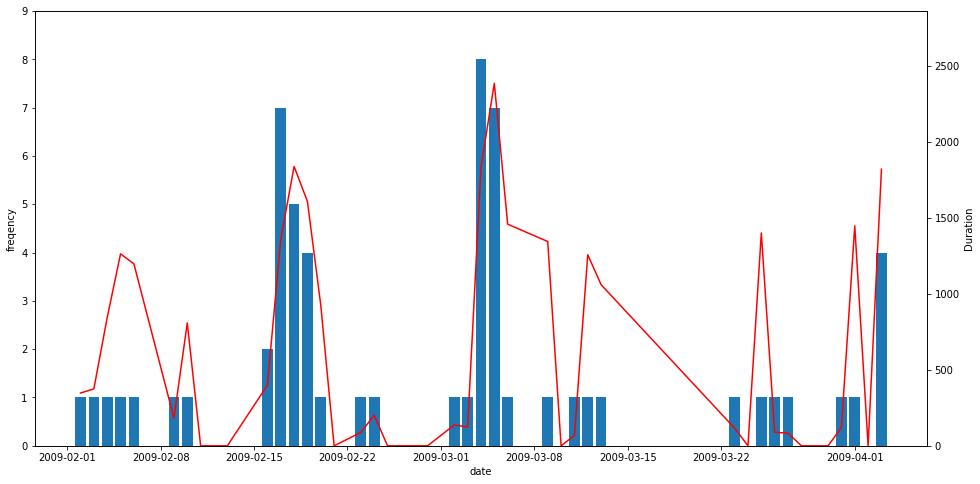

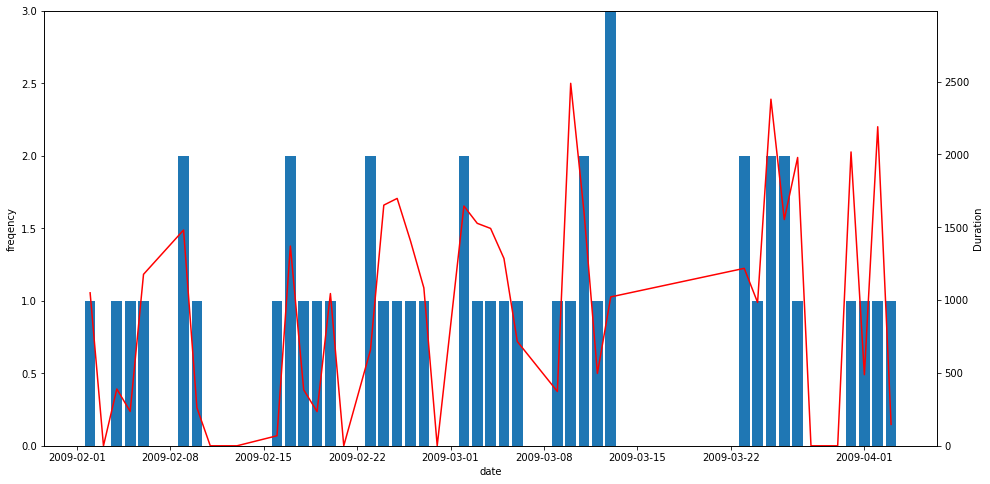

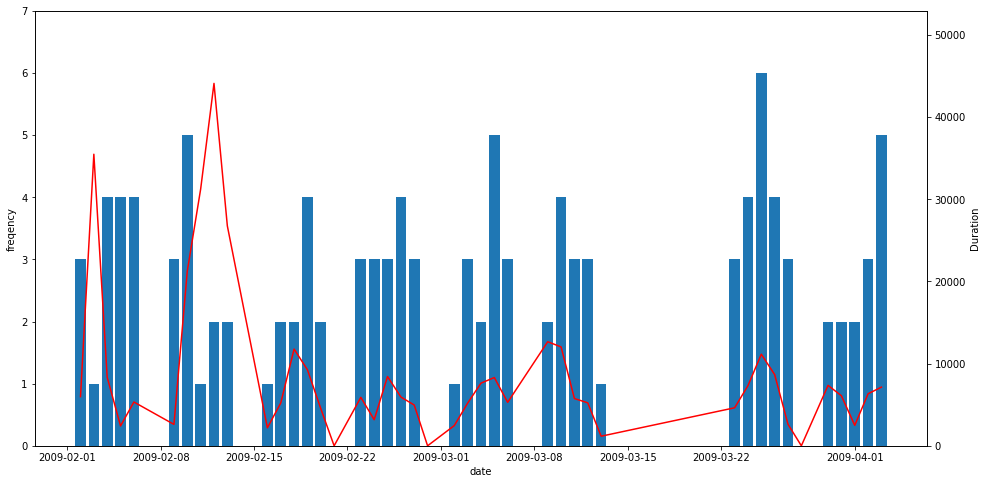

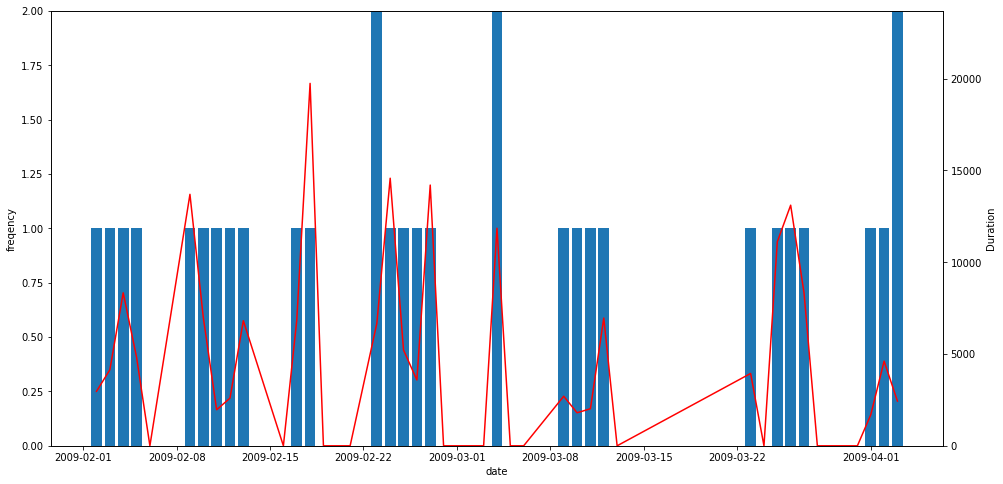

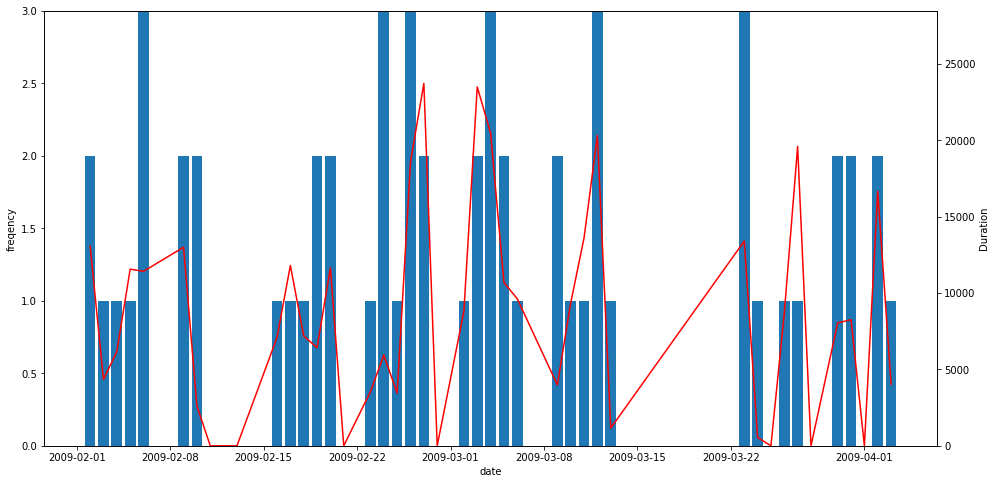

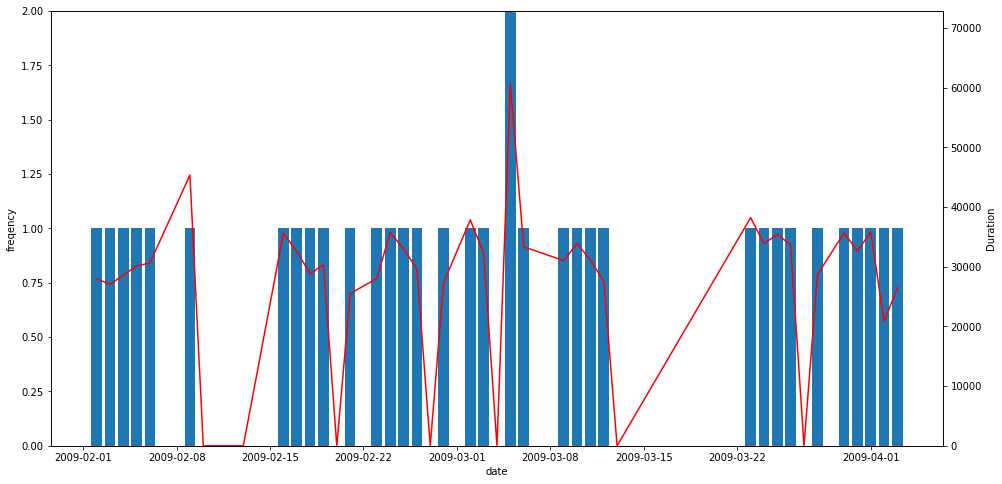

In [38]:
plot_day_activity_statistics(resampled_df_list[0], valid_R1_activities[0])
plot_day_activity_statistics(resampled_df_list[1], valid_R1_activities[1])
plot_day_activity_statistics(resampled_df_list[2], valid_R1_activities[2])
plot_day_activity_statistics(resampled_df_list[3], valid_R1_activities[3])
plot_day_activity_statistics(resampled_df_list[4], valid_R1_activities[4])
plot_day_activity_statistics(resampled_df_list[5], valid_R1_activities[5])


## 1.7 对每个activity的df计算freq和time_span的z-score,看异常值

# 2 对得到的数据进行kmeans聚类，看能不能区分出normal abnormal

In [24]:
from sklearn import metrics
from sklearn.cluster import KMeans

def KMeans_Classifier(X, k, fig_name):

    # the bulit-in function for K-means,
    # where n_clusters is the number of clusters.
    kmeans = KMeans(n_clusters=k)

    # fit the algorithm with dataset
    kmeans.fit(X)

    # predict after fit
    y_kmeans = kmeans.predict(X)

    #     # Plot the data
    # plt.scatter(X[:,0], X[:,1])
    #
    # # Plot the clusters
    # plt.scatter(kmeans.cluster_centers_[:, 0],
    #             kmeans.cluster_centers_[:, 1],
    #             s=200,                             # Set centroid size
    #             c='red')                           # Set centroid color
    # path = "images/KMeans_results/" + fig_name+".pdf"
    # plt.savefig(path)
    # plt.show()

    # get the centers after fit
    centers = kmeans.cluster_centers_

    # report = metrics.classification_report(Y, y_kmeans)
    # print("Kmeans classification report:\n " + report)
    # score = metrics.accuracy_score(Y, y_kmeans)

    return y_kmeans, centers

In [27]:
y_pred, _ = KMeans_Classifier(resampled_df_concat, 2, "concat")
resampled_df_concat["y_pred"] = y_pred
resampled_df_concat.to_csv("resample_by_day_concat_KMeans_result.csv")

/var/folders/vq/j65rj4vx6mgdgbzwrggmrn6h0000gn/T/ipykernel_23367/308159800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resampled_df_concat["y_pred"] = y_pred


In [28]:
resampled_df_concat

,time_span,freq,time_span,freq,time_span,freq,time_span,freq,time_span,freq,time_span,freq,y_pred
start_time,,,,,,,,,,,,,
2009-02-02,347,1,1050,1,5984,3,2968,1,13088,2,27987,1,0
2009-02-03,374,1,0,0,35486,1,4140,1,4346,1,27048,1,0
2009-02-04,843,1,390,1,8341,4,8333,1,6161,1,28562,1,0
2009-02-05,1262,1,236,1,2414,4,4834,1,11567,1,30119,1,0
2009-02-06,1196,1,1177,1,5330,4,0,0,11427,3,30623,1,0
2009-02-09,182,1,1481,2,2606,3,13699,1,13004,2,45361,1,0
2009-02-10,808,1,261,1,21265,5,6992,1,2610,2,0,0,1
2009-02-11,0,0,0,0,31237,1,1963,1,0,0,0,0,1
2009-02-12,0,0,0,0,44109,2,2598,1,0,0,0,0,1


In [29]:
y_pred, _ = KMeans_Classifier(resampled_df_list[0].values, 2, valid_R1_activities[0])
y_pred, _ = KMeans_Classifier(resampled_df_list[1].values, 2, valid_R1_activities[1])
y_pred, _ = KMeans_Classifier(resampled_df_list[2].values, 2, valid_R1_activities[2])
y_pred, _ = KMeans_Classifier(resampled_df_list[3].values, 2, valid_R1_activities[3])
y_pred, _ = KMeans_Classifier(resampled_df_list[4].values, 2, valid_R1_activities[4])
y_pred, _ = KMeans_Classifier(resampled_df_list[5].values, 2, valid_R1_activities[5])

In [30]:
new_df[new_df["activity"] == "R1_Sleep"]

,activity,start_time,end_time,time_span
312,R1_Sleep,2009-02-02 22:10:55,2009-02-03 05:57:22,27987
313,R1_Sleep,2009-02-03 22:25:44,2009-02-04 05:56:32,27048
314,R1_Sleep,2009-02-04 22:55:00,2009-02-05 06:51:02,28562
315,R1_Sleep,2009-02-05 23:11:49,2009-02-06 07:33:48,30119
316,R1_Sleep,2009-02-06 23:52:40,2009-02-07 08:23:03,30623
317,R1_Sleep,2009-02-09 20:45:44,2009-02-10 09:21:45,45361
318,R1_Sleep,2009-02-16 22:41:08,2009-02-17 08:34:56,35628
319,R1_Sleep,2009-02-17 22:41:57,2009-02-18 07:44:47,32570
320,R1_Sleep,2009-02-18 22:46:24,2009-02-19 06:46:58,28834
321,R1_Sleep,2009-02-19 20:01:03,2009-02-20 04:26:43,30340


In [31]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
def plot_trend_seasonality_noise(df, attr_name, file_name):
    """
    Plot the trend, seasonality and noise of an attribute in a DF.
    :param df:
        Data frame.
    :param attr_name:
        Name of the attribute.
    :param file_name:
        File name to save.
    """
    plt.rcParams['figure.figsize'] = 11,9
    plt.rcParams['lines.linewidth']=0.5
    plt.rcParams['lines.markersize']=1
    decomposed = sm.tsa.seasonal_decompose(df[attr_name],period=7)
    figure = decomposed.plot()

    download_dir="images/"
    if not os.path.exists(download_dir):
        os.makedirs(download_dir)
    path = os.path.join(download_dir, file_name)
    if not os.path.exists(path):
        plt.savefig(path)
        print("The figure is saved with ", str(path))
        return
    print("The figure is already saved as ", str(path))
    return

The figure is already saved as  images/sleep_time_season.pdf


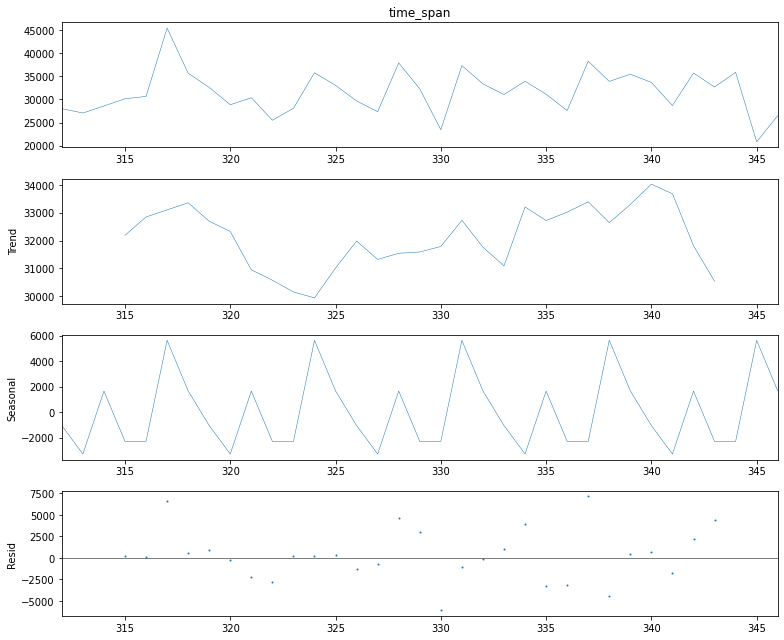

In [32]:
plot_trend_seasonality_noise(new_df[new_df["activity"] == "R1_Sleep"], "time_span", "sleep_time_season.pdf")